# SteetEasy Rent Prediction Project

# Dataset Overview

**StreetEasy** is New York City's leading real estate marketplace - from studios to high-rises, Brooklyn Heights to Harlem.

* In this project, you will be working with a dataset that contains a sample of 5,000 rentals listings in ``Manhattan``, ``Brooklyn``, and ``Queens``, active on StreetEasy in June 2016.

It has the following columns:

* ``rental_id``: rental ID
* ``rent``: price of rent in dollars
* ``bedrooms``: number of bedrooms
* ``bathrooms``: number of bathrooms
* ``size_sqft``: size in square feet
* ``min_to_subway``: distance from subway station in minutes
* ``floor``: floor number
* ``building_age_yrs``: building’s age in years
* ``no_fee``: does it have a broker fee? (0 for fee, 1 for no fee)
* ``has_roofdeck``: does it have a roof deck? (0 for no, 1 for yes)
* ``has_washer_dryer``: does it have washer/dryer in unit? (0/1)
* ``has_doorman``: does it have a doorman? (0/1)
* ``has_elevator``: does it have an elevator? (0/1)
* ``has_dishwasher``: does it have a dishwasher (0/1)
* ``has_patio``: does it have a patio? (0/1)
* ``has_gym``: does the building have a gym? (0/1)
* ``neighborhood``: (ex: Greenpoint)
* ``borough``: (ex: Brooklyn)

More information about this dataset can be found in the StreetEasy Dataset article. --> https://www.codecademy.com/content-items/d19f2f770877c419fdbfa64ddcc16edc

Let’s start by doing exploratory data analysis to understand the dataset better. We have broken the dataset for you into:

* manhattan.csv --> https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv
* brooklyn.csv  --> https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv
* queens.csv   --> https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
# import joblib

# Load your dataset
streeteasy = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")

## 1. Initial Data Inspection

First, get a basic understanding of your dataset's structure and health.

* **View Data Shape and Info** : Check the number of rows and columns, column names, and data types. This helps you spot columns that might be read incorrectly (e.g., numbers as strings).



In [3]:
print(streeteasy.shape)
print(streeteasy.info())

(3539, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null

**Check for Missing Values**: Identify which columns have missing data. You'll need to decide later whether to fill them (e.g., with the mean/median) or drop them.

In [4]:
print(streeteasy.isnull().sum())

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64


**Generate Descriptive Statistics**: Get a summary of your numerical columns (mean, median, standard deviation). This is great for a quick look at the distribution and scale of features like ``rent``, ``size_sqft``, ``bedrooms``, etc.

In [5]:
print(streeteasy.describe())

          rental_id          rent     bedrooms    bathrooms    size_sqft  \
count   3539.000000   3539.000000  3539.000000  3539.000000  3539.000000   
mean    5332.589997   5138.940379     1.351936     1.366770   939.727324   
std     3311.552136   3162.824760     0.967595     0.599588   477.949074   
min        1.000000   1300.000000     0.000000     0.000000   250.000000   
25%     2443.500000   3150.000000     1.000000     1.000000   613.000000   
50%     5128.000000   4000.000000     1.000000     1.000000   800.000000   
75%     8149.500000   6000.000000     2.000000     2.000000  1141.000000   
max    11349.000000  20000.000000     5.000000     5.000000  4800.000000   

       min_to_subway        floor  building_age_yrs       no_fee  \
count    3539.000000  3539.000000       3539.000000  3539.000000   
mean        4.970896    11.908307         51.994914     0.403504   
std         5.513589    10.960893         39.380433     0.490669   
min         0.000000     0.000000          

## 2. Analyza the Target Variable (``rent``)


Understanding the variable you want to predict is the most important step.

* **Visualize the Rent Distribution**: Use a histogram and a boxplot to see the spread of rental prices. Look for:

    * **Skewness**: Is the data skewed to one side? A log transformation (``np.log(df['rent'])``) might be needed if it's heavily skewed, which often helps linear models perform better.

    * **Outliers**: Are there extremely high or low rent values? Boxplots are excellent for spotting these.

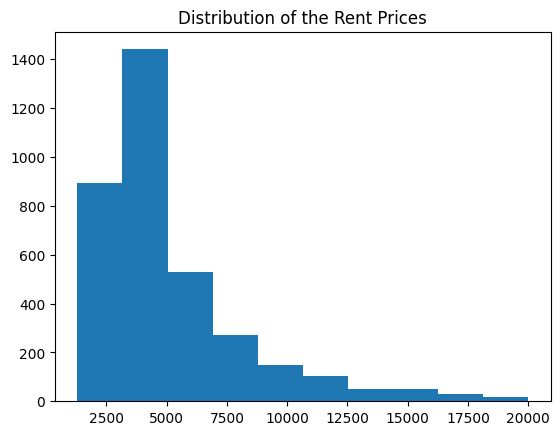

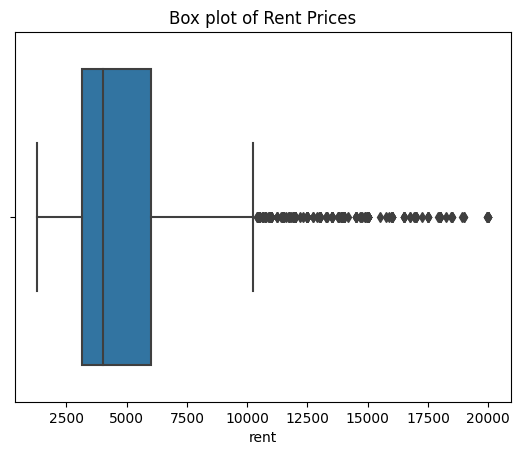

In [6]:
plt.hist(streeteasy["rent"])
plt.title("Distribution of the Rent Prices")
plt.show()

sns.boxplot(x = streeteasy["rent"])
plt.title("Box plot of Rent Prices")
plt.show()

## Analyza Relationships with Rent (Feature Selection)

This is where you find out which features are most likely to be good predictors.

* **Numerical Features vs. Rent**:

    * **Scatter Plots**: Use scatter plots to visually check for a linear relationship between features like ``size_sqft``, ``bedrooms``, and ``bathrooms`` with rent. A clear trend (e.g., as sq_ft increases, rent increases) indicates a useful feature.
    

#### # do this for all variables that you are considering in this project: ``bedrooms``, ``bathrooms``, ``size_sqft``, ``min_to_subway``, ``floor``, ``building_age_yrs``, ``no_fee``, ``has_roofdeck``, ``has_washer_dryer``, ``has_doorman``, ``has_elevator``, ``has_dishwasher``, ``has_patio``, ``has_gym`` 

In [7]:
print(streeteasy.head())

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

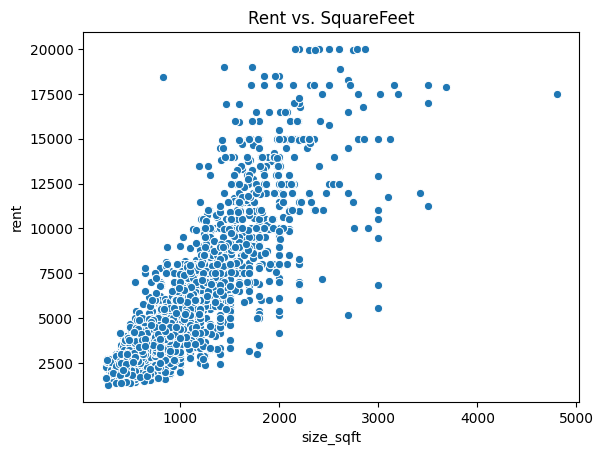

In [8]:
sns.scatterplot(x = "size_sqft", y = "rent", data = streeteasy)
plt.title("Rent vs. SquareFeet")
plt.show()

# i can see a positive relation here... As sqft increases rent increases

**  **Correlation Heatmap**: Calculate the correlation matrix to get a numerical measure of the linear relationships between all your numerical variables. A value close to 1 or -1 indicates a strong linear relationship. Features with high correlation to rent are strong candidates for your model.

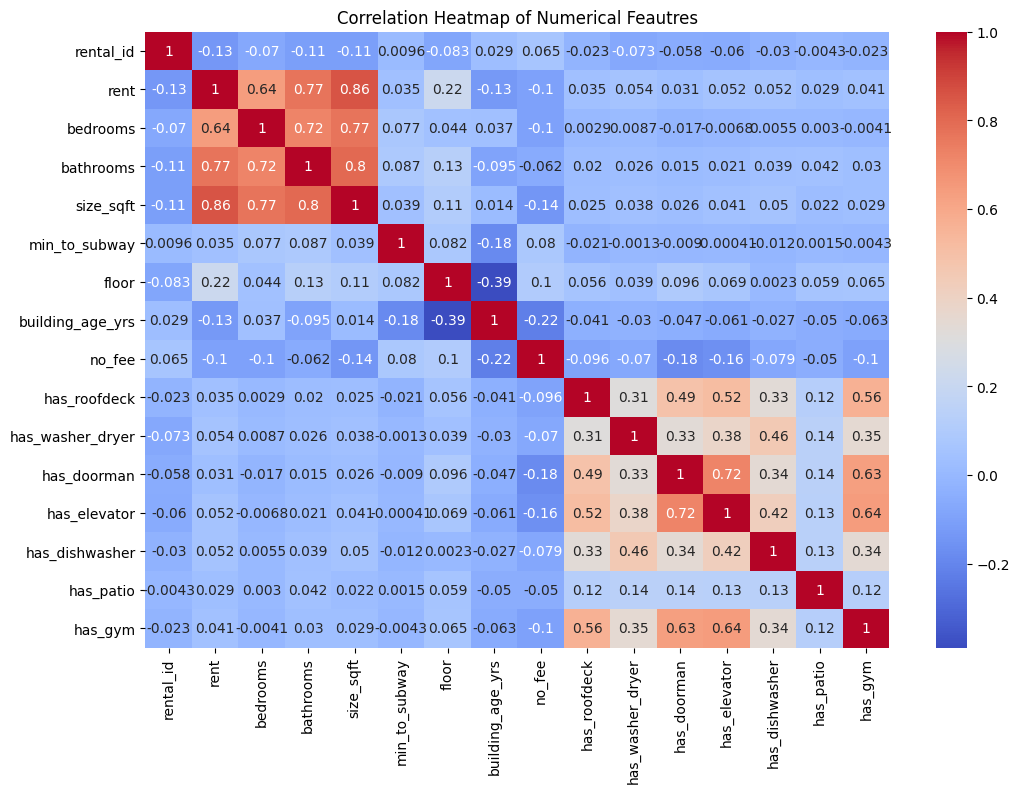

In [9]:
# Select only the numeric columns for correlation
numeric_df = streeteasy.select_dtypes(include = np.number)
plt.figure(figsize = (12, 8))
sns.heatmap(numeric_df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap of Numerical Feautres")
plt.show()

* **Categorical Features vs. Rent**:

    * **Boxplots**: Use boxplots to see how rent varies across different categories like ``neighborhood``, ``has_doorman``, or ``has_gym``. If the median rent and distribution are very different between categories (e.g., rent in 'SoHo' vs. 'Harlem'), the feature is a great predictor.
    * **Count Plots**: Use countplot to see the frequency of each category. This helps you identify rare categories that might not be useful or could be grouped together.

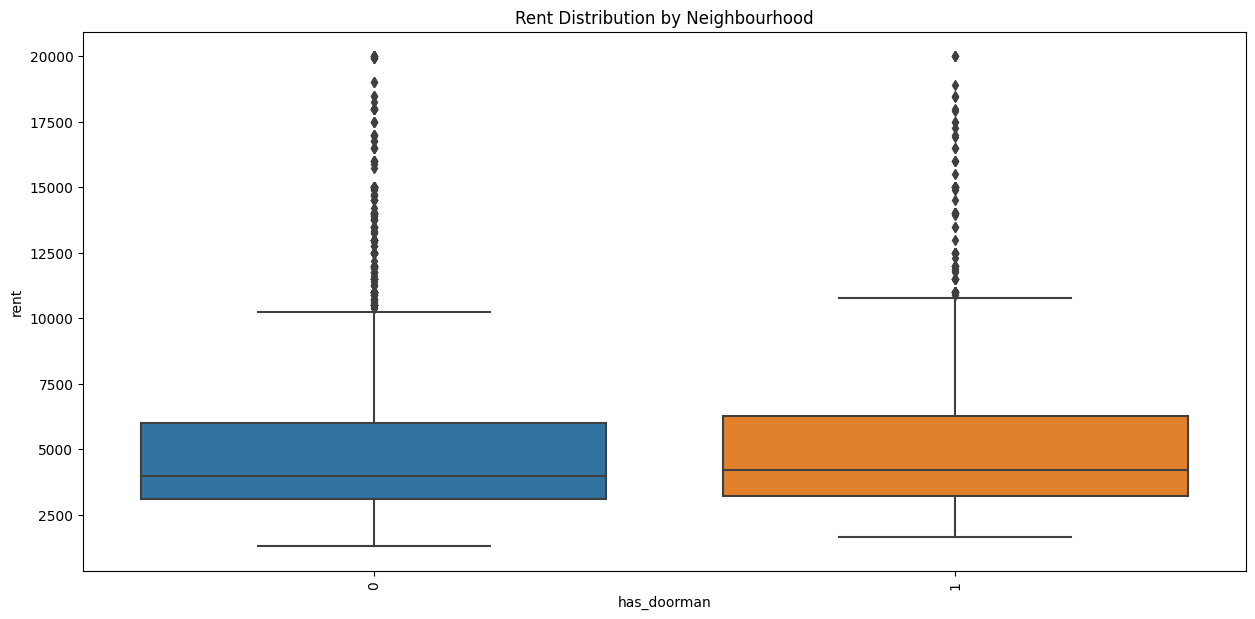

In [10]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'has_doorman', y = "rent", data = streeteasy)
plt.xticks(rotation = 90)
plt.title("Rent Distribution by Neighbourhood")
plt.show()

In [11]:
print(streeteasy.columns)

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')


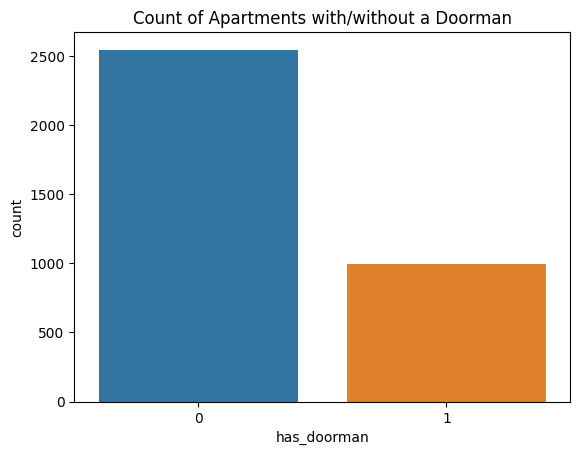

In [12]:
sns.countplot(x='has_doorman', data=streeteasy)
plt.title('Count of Apartments with/without a Doorman')
plt.show()

##### By completing these EDA tasks, you'll have a solid basis for choosing the most impactful features for your multiple linear regression model.

# Building the Model

In [13]:
# define the features and target...

features = ["bedrooms", "bathrooms", 'size_sqft', 'min_to_subway', 'floor',
    'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
    'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym' ]
target = ["rent"]

In [14]:
X = streeteasy[features]
y = streeteasy[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model (optional but useful for iteration)
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:.2f}")

[[ 5026.51034172]
 [ 5538.64955058]
 [ 4110.14009423]
 [ 5181.50504333]
 [ 3579.85208184]
 [ 2956.88195331]
 [ 7209.65124206]
 [ 5943.8399084 ]
 [ 4238.20278733]
 [ 8323.20878917]
 [ 3616.06684802]
 [ 5683.1919604 ]
 [ 3965.72440178]
 [ 3915.19360894]
 [ 5183.00785229]
 [ 3937.2150152 ]
 [ 3428.74388401]
 [ 2798.07021612]
 [ 3483.563447  ]
 [ 4767.36155406]
 [ 3511.32401931]
 [ 9558.58978938]
 [ 6016.24834877]
 [ 4400.20066776]
 [ 2352.54046764]
 [ 3469.37124752]
 [ 6515.0785934 ]
 [ 5176.3858965 ]
 [ 9052.29910081]
 [ 9751.2788246 ]
 [ 3284.65725501]
 [ 3974.46456106]
 [ 4221.77583042]
 [ 7486.46685755]
 [10360.7778596 ]
 [ 4949.2207212 ]
 [ 2338.61695379]
 [ 4385.17192339]
 [ 3028.1869484 ]
 [11278.40787749]
 [ 3419.82328334]
 [12726.49520351]
 [ 6467.83912285]
 [ 1627.54762514]
 [ 3410.93839911]
 [ 4918.00983127]
 [ 6550.50363047]
 [ 4011.92905322]
 [ 4648.13490579]
 [ 4027.7846466 ]
 [14700.9349287 ]
 [ 9306.96313813]
 [ 4086.44812584]
 [11670.67416777]
 [ 6168.81133711]
 [ 6210.45

**RMSE (Root Mean Squared Error)** measures how far your model's predictions are from the actual rent values.

    *🔍 In simple terms:
    It tells you "on average, how much your predictions are wrong by", in the same units as your target — here, dollars ($).

    * 🎯 Lower RMSE = Better model
    E.g., RMSE = $350 means your rent predictions are typically off by around $350.

It's a standard way to evaluate regression models.

In [16]:
import joblib
import os

# Save the model
os.makedirs("ml_model", exist_ok=True)
joblib.dump(model, "ml_model/rent_model.pkl")
print("📦 Model saved to ml_model/rent_model.pkl")

📦 Model saved to ml_model/rent_model.pkl


In [19]:
print(streeteasy.columns + "\n")
print(features)

Index(['rental_id\n', 'rent\n', 'bedrooms\n', 'bathrooms\n', 'size_sqft\n',
       'min_to_subway\n', 'floor\n', 'building_age_yrs\n', 'no_fee\n',
       'has_roofdeck\n', 'has_washer_dryer\n', 'has_doorman\n',
       'has_elevator\n', 'has_dishwasher\n', 'has_patio\n', 'has_gym\n',
       'neighborhood\n', 'borough\n'],
      dtype='object')
['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']


In [32]:
new_apartment = np.array([1, 1, 620, 12, 6, 52, 0, 1, 1, 1, 1, 1, 1, 1]).reshape(1, -1)
new_apartment_prediction = model.predict(new_apartment)
print(new_apartment_prediction)

[[2907.85531191]]
